<h1><center>Movies Dataset<center><h1>

# My Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore
from PIL import Image                     
from IPython.display import display
import urllib.request
import time

# My Figure Size

In [2]:
from matplotlib import rcParams            
rcParams['figure.figsize'] = (8,6)  

# Remove Warning

In [3]:
import warnings
warnings.simplefilter("ignore")

# My Dataset

In [4]:
movies = pd.read_csv('Datasets/mymoviedb.csv',lineterminator='\n')
movies.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Exploring My data

## EDA Questions
> - What is the most frequent genre in the dataset? <br><br>
> - What genres has highest votes? <br><br>
> - What movie got the highest popularity? <br><br>
> - Which year has the most number of movies?

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
print(Fore.LIGHTBLUE_EX + 'Number of Rows is : ', movies.shape[0])
print(Fore.LIGHTBLUE_EX + 'Number of columns is : ', movies.shape[1])

Number of Rows is :  9827
Number of columns is :  9


In [7]:
print(Fore.LIGHTBLUE_EX,'There is "{}" complete duplicate'.format(movies.duplicated().sum()))

 There is "0" complete duplicate


In [8]:
print(Fore.LIGHTBLUE_EX,'There is "{}" duplicates in movie name'.format(movies['Title'].duplicated().sum()))

 There is "314" duplicates in movie name


## After seeing `"Title"` duplicates, I noticed that these movies aren't duplicates but it only got same name (they are different movies) So I won't remove any of them

In [9]:
movies.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [10]:
print(Fore.LIGHTBLUE_EX + 'Number of NaN values is : ')
movies.isna().sum()

Number of NaN values is : 


Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

# Visualizing quantitative data

In [11]:
## This is a function to create violin plots for my data

def explore_using_violin_plot():
    fig = plt.figure(figsize=(32,8))
    the_ylabels = ['Popularity','Vote Count','Vote Average']

    counter = 0

    for i in movies.columns:
        if movies[i].dtype != 'object':
            sub = fig.add_subplot(1,5,counter+1)
            g1 = sns.violinplot(y=i,data=movies,palette='crest')
            plt.ylabel(the_ylabels[counter],size=15,color='#1e90c9')
            counter = counter + 1

    plt.text(-2.8, 11.3, "Most of popularity is less than 35",
             horizontalalignment='left', size=15, color='#1e90c9')

    plt.text(-1.65, 11.3, "Most of Vote count is less than 1500",
             horizontalalignment='left', size=15, color='#1e90c9')

    plt.text(-0.5, 11.3, "Most of Vote average is betewwn 5 and 8",
             horizontalalignment='left', size=15, color='#1e90c9')

    plt.show()

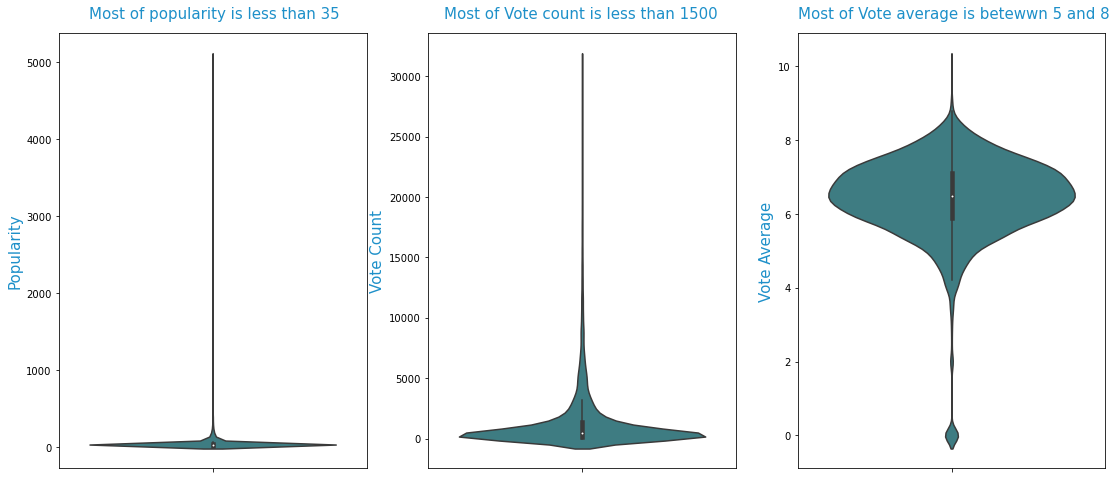

In [12]:
explore_using_violin_plot()

## This violin plot will help to know what is the range of data and where it is maximum and howit's distribution looks like

## Ok after exploring data I noticed many things
> - dataframe has `9827 rows` and `9 columns`. <br><br>
> - No `NaN values` nor `duplicated values`. <br><br>
> - `Overview` and `Poster-Url` wouldn't be so useful during analysis, so we'll drop them. <br><br>
> - There is many movies with `Vote count = 0` `and Vote average = 0`, which is a very strange thing !!! <br><br>
> - `Release_Date` column should be date and I will make it focus only on year. Because I don't care about neither month nor day then I will change that date to int

# Now For Data Cleaning :) <br><br><br>

### Here I want to know why ther is movies with `Vote count = 0` and `Vote average = 0`

In [13]:
underrated_movies = movies[(movies['Vote_Average'] == 0) & (movies['Vote_Count'] == 0)]
print(Fore.LIGHTBLUE_EX + 'shape of these movies is : ',underrated_movies.shape)
underrated_movies.head()

shape of these movies is :  (100, 9)


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
80,2022-03-30,Sonic the Hedgehog 2,"After settling in Green Hills, Sonic is eager ...",317.159,0,0.0,en,"Action, Science Fiction, Comedy, Family",https://image.tmdb.org/t/p/original/6DrHO1jr3q...
210,2023-04-06,Fast & Furious 10,The tenth installment in the Fast Saga.,181.216,0,0.0,en,"Action, Crime",https://image.tmdb.org/t/p/original/2DyEk84Xnb...
231,2022-04-22,Dragon Ball Super: Super Hero,"The Red Ribbon Army, an evil organization that...",170.551,0,0.0,ja,"Animation, Science Fiction, Action",https://image.tmdb.org/t/p/original/wFYXVMKWLA...
232,2022-08-25,After Ever Happy,The fourth installment in The After Universe. ...,169.964,0,0.0,en,Romance,https://image.tmdb.org/t/p/original/vWLyXOFm1C...
314,2022-03-17,The Bad Guys,When the infamous Bad Guys are finally caught ...,146.548,0,0.0,en,"Animation, Comedy, Action, Family, Crime",https://image.tmdb.org/t/p/original/qT2LvVFPB8...


### There is 100 row with `Vote count = 0` and `Vote average = 0` !!! 
### I really have no ideawhy is that happening but I noticed some rows where date is 2023... So I can tell that some of these data is not rated because it is in the future
### So I think these data was collected before these movies and there is very underrated movies that no-one knows about 
### Whatever the reason... Such rows are not good to be in my data so I will drop them

Shape of movies dataframe was :  (9827, 9)
Shape of movies dataframe now is :  (9727, 9)






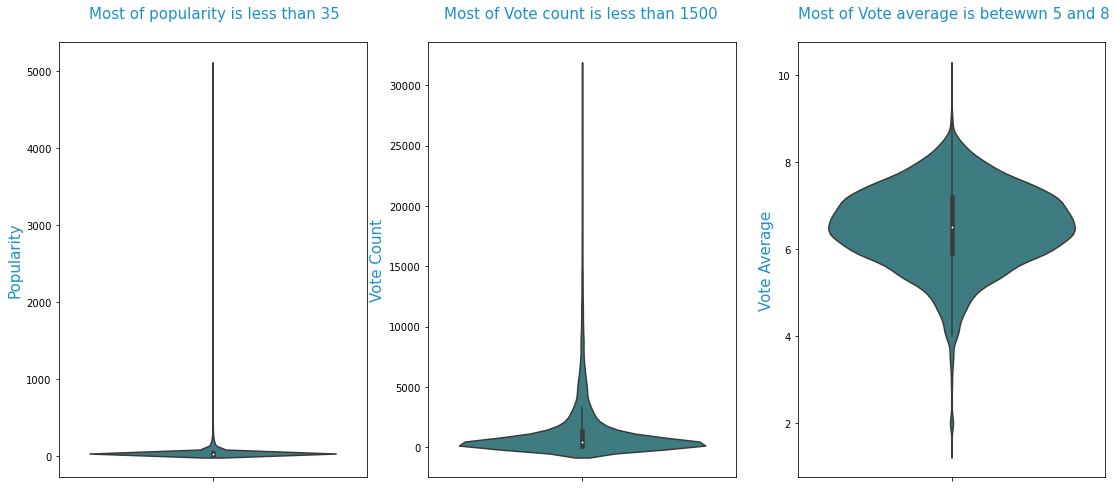

In [14]:
print(Fore.BLUE + 'Shape of movies dataframe was : ',movies.shape)
movies.drop(underrated_movies.index,inplace=True)
print(Fore.LIGHTBLUE_EX + 'Shape of movies dataframe now is : ',movies.shape)


print('\n\n\n')

explore_using_violin_plot()

### Now from violin plot I can notice that my data became more better where vote average now looks clean after removing zeros

#### Changing `Release_Date` column type into date :

In [15]:
print(Fore.BLUE + 'Release_Date column type was : ',movies['Release_Date'].dtypes)
movies['Release_Date'] = pd.to_datetime(movies['Release_Date'])
print('\n')
print(Fore.LIGHTBLUE_EX + 'Release_Date column type now is : ',movies['Release_Date'].dtypes)

Release_Date column type was :  object


Release_Date column type now is :  datetime64[ns]


In [16]:
movies['Release_Date'] = movies['Release_Date'].dt.year
print(Fore.LIGHTBLUE_EX + 'Release_Date column type now is : ',movies['Release_Date'].dtypes)

Release_Date column type now is :  int64


### Dropping useless columns :

In [17]:
movies_data = movies.drop(['Poster_Url','Overview'],axis=1)
movies_data.head()

# I don't care about poster url nor overview for now 

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,en,Thriller
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


In [18]:
start = time.time()

movie_Genre = {}

for genre in movies_data['Genre']:
    for i in genre.split(', '):
        if i not in movie_Genre:
            movie_Genre[i] = 1
        else:
            movie_Genre[i] = movie_Genre[i] + 1

            
end = time.time()

print(Fore.LIGHTBLUE_EX + 'Time taken by the nested for loop is : ',(end - start))

Time taken by the nested for loop is :  0.00797891616821289


## Ok !!! I know that I used nested for loop here to get number of each genre but I calculated time and it was good because second loop iterates on small list 

In [19]:
movie_Genre_df = pd.DataFrame(list(movie_Genre.items()),columns = ['Genre','Number of movies'])

movie_Genre_df

,Genre,Number of movies
0,Action,2652
1,Adventure,1829
2,Science Fiction,1255
3,Crime,1235
4,Mystery,765
5,Thriller,2473
6,Animation,1426
7,Comedy,3006
8,Family,1405
9,Fantasy,1295


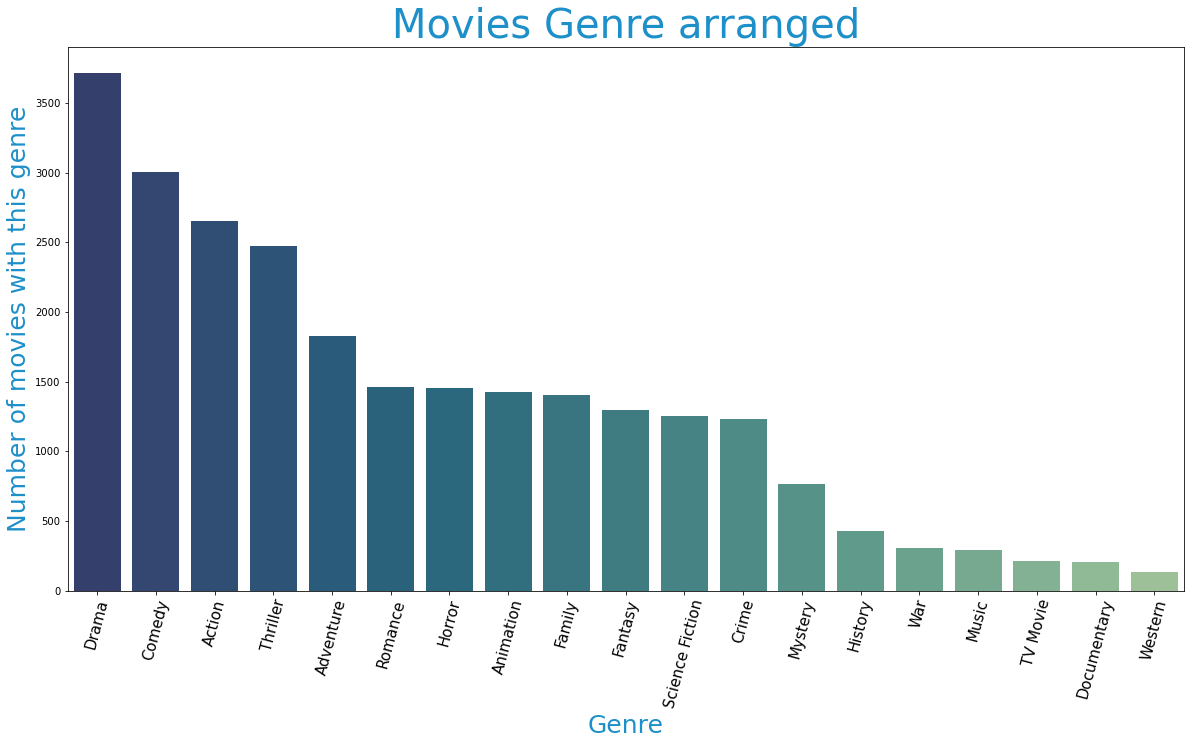

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='Genre',y='Number of movies',ax=ax,
            data=movie_Genre_df.sort_values('Number of movies',ascending=False),palette='crest_r')

plt.ylabel('Number of movies with this genre',size=25,color='#1e90c9')
plt.xlabel('Genre',size=25,color='#1e90c9')
plt.title('Movies Genre arranged',size=40,color='#1e90c9')

plt.xticks(rotation=75,size=15)
plt.show()

# Now I will make new column in the dataframe named as "Vote Average cuts" which will contain the values either (Popular - Average - Not Popular) depending on Average vote column

In [21]:
label_names = ['Not Popular', 'Average', 'Popular']
movies_data['Vote Average cuts'] = pd.qcut(movies_data['Vote_Average'], q = 3,labels = label_names)
movies_data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Vote Average cuts
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",Popular
1,2022,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",Popular
2,2022,No Exit,2618.087,122,6.3,en,Thriller,Average
3,2021,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",Popular
4,2021,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",Popular


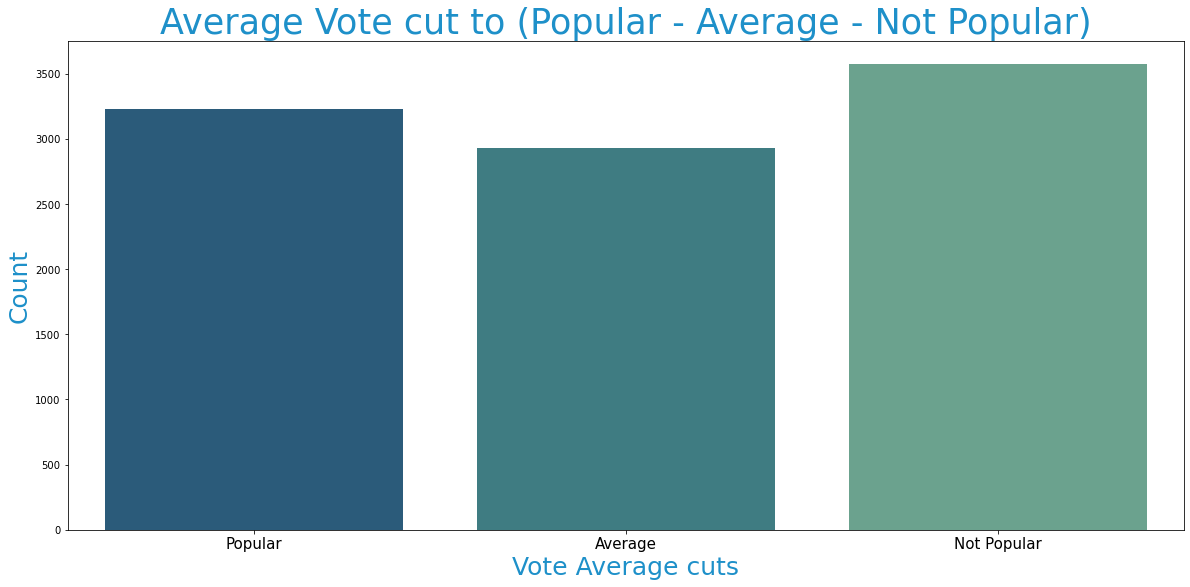

In [22]:
fig, ax = plt.subplots(figsize=(20, 9))
sns.countplot(x='Vote Average cuts',data=movies_data,order=['Popular','Average','Not Popular'],palette='crest_r')

plt.ylabel('Count',size=25,color='#1e90c9')
plt.xlabel('Vote Average cuts',size=25,color='#1e90c9')
plt.title('Average Vote cut to (Popular - Average - Not Popular)',size=35,color='#1e90c9')
plt.xticks(size=15)

plt.show()

In [23]:
values = movies_data['Vote Average cuts'].value_counts()
values

Not Popular    3574
Popular        3227
Average        2926
Name: Vote Average cuts, dtype: int64

### Making color paletter :

In [24]:
my_palette = sns.color_palette("crest_r", len(values))
my_palette

[(0.11572661, 0.36838709, 0.52803124),
 (0.20350004, 0.5231837, 0.55370601),
 (0.38240013, 0.67082685, 0.56570561)]

## Visualizing Vote Average cuts

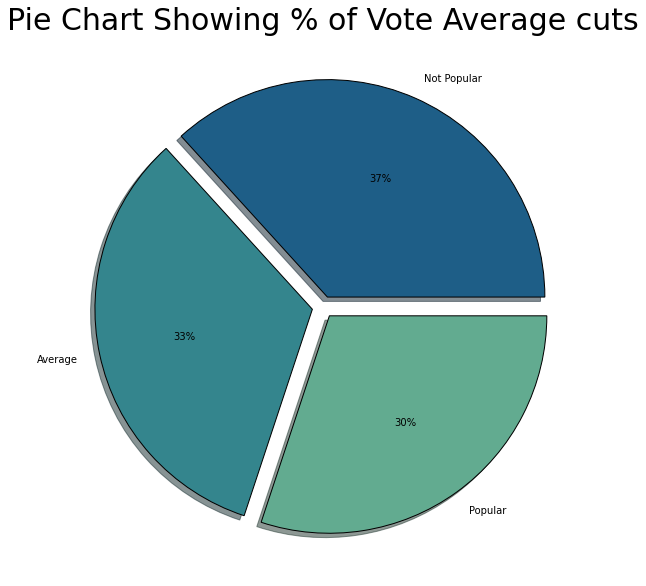

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))

plt.title('Pie Chart Showing % of Vote Average cuts',size=30)
my_explode = [0.05, 0.05, 0.05]    

plt.pie(values, labels = label_names, colors = my_palette, autopct='%.0f%%',shadow=True,explode=my_explode,
        wedgeprops={'edgecolor':'Black'})


plt.show()

# Now I want to know which genres has highest Vote 
## So I will use my created Vote Average cuts column for that where I will see what Genre is popular and I will find there count
## To do so I will split then explode Genre column creating a new data frame named as `df_for_genre` where it will contain each movie many times according to it's Genre
## Note that : this `df_for_genre` will only be used for this question because it will help me to know the answer and I will not use it again !!

In [26]:
df_for_genre = movies_data[0::]

df_for_genre['Genre'] = df_for_genre['Genre'].str.split(', ')

df_for_genre = df_for_genre.explode('Genre').reset_index()
df_for_genre.drop('index',axis=1,inplace=True)
df_for_genre.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Vote Average cuts
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,Popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure,Popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction,Popular
3,2022,The Batman,3827.658,1151,8.1,en,Crime,Popular
4,2022,The Batman,3827.658,1151,8.1,en,Mystery,Popular


In [27]:
movie_Genre_population = {}

counter = 0

for i in df_for_genre['Vote Average cuts']:
    genre_value = df_for_genre['Genre'].loc[counter]
    if i == 'Popular':
        if genre_value not in movie_Genre_population:
            movie_Genre_population[genre_value] = 1
        else:
            movie_Genre_population[genre_value] = movie_Genre_population[genre_value] + 1
    counter = counter + 1
    
print(Fore.LIGHTBLUE_EX + 'The dictionary of values is : \n ',movie_Genre_population)

The dictionary of values is : 
  {'Action': 723, 'Adventure': 607, 'Science Fiction': 344, 'Crime': 430, 'Mystery': 241, 'Thriller': 548, 'Animation': 709, 'Comedy': 835, 'Family': 498, 'Fantasy': 472, 'War': 161, 'Drama': 1670, 'Music': 151, 'Romance': 544, 'Western': 65, 'Horror': 192, 'History': 236, 'TV Movie': 74, 'Documentary': 129}


In [28]:
movie_Genre_population_df = pd.DataFrame(list(movie_Genre_population.items()),columns = ['Genre','Number of movies'])

movie_Genre_population_df

,Genre,Number of movies
0,Action,723
1,Adventure,607
2,Science Fiction,344
3,Crime,430
4,Mystery,241
5,Thriller,548
6,Animation,709
7,Comedy,835
8,Family,498
9,Fantasy,472


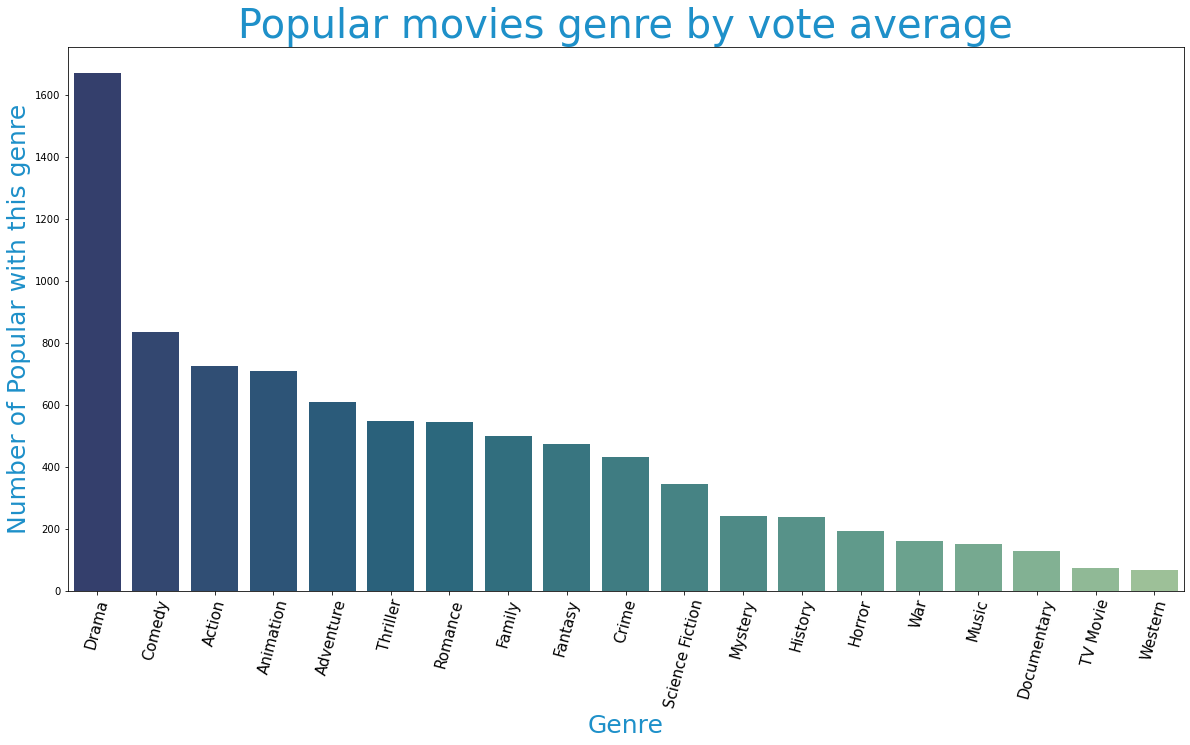

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='Genre',y='Number of movies',ax=ax,
            data=movie_Genre_population_df.sort_values('Number of movies',ascending=False),palette='crest_r')

plt.ylabel('Number of Popular with this genre',size=25,color='#1e90c9')
plt.xlabel('Genre',size=25,color='#1e90c9')
plt.title('Popular movies genre by vote average',size=40,color='#1e90c9')

plt.xticks(rotation=75,size=15)
plt.show()

## Now I will Show top 10 movies with highest popularity and top 10 movies with highest vote count

In [30]:
top_10_popular = movies_data.sort_values(by='Popularity',ascending=False).head(10)
top_10_vote_average = movies_data.sort_values(by='Vote_Count',ascending=False).head(10)

### Making color paletter :

In [31]:
my_palette = sns.color_palette("crest_r", len(top_10_popular['Genre'].unique()))
my_palette

[(0.15765823, 0.26326032, 0.48167456),
 (0.12811691, 0.33411727, 0.51652464),
 (0.11087217, 0.39917938, 0.53604354),
 (0.14051521, 0.46268258, 0.54653253),
 (0.20350004, 0.5231837, 0.55370601),
 (0.26693801, 0.58118582, 0.56045121),
 (0.33948744, 0.64143931, 0.56487679),
 (0.42702625, 0.69711868, 0.56614659),
 (0.53792417, 0.75090328, 0.56912118)]

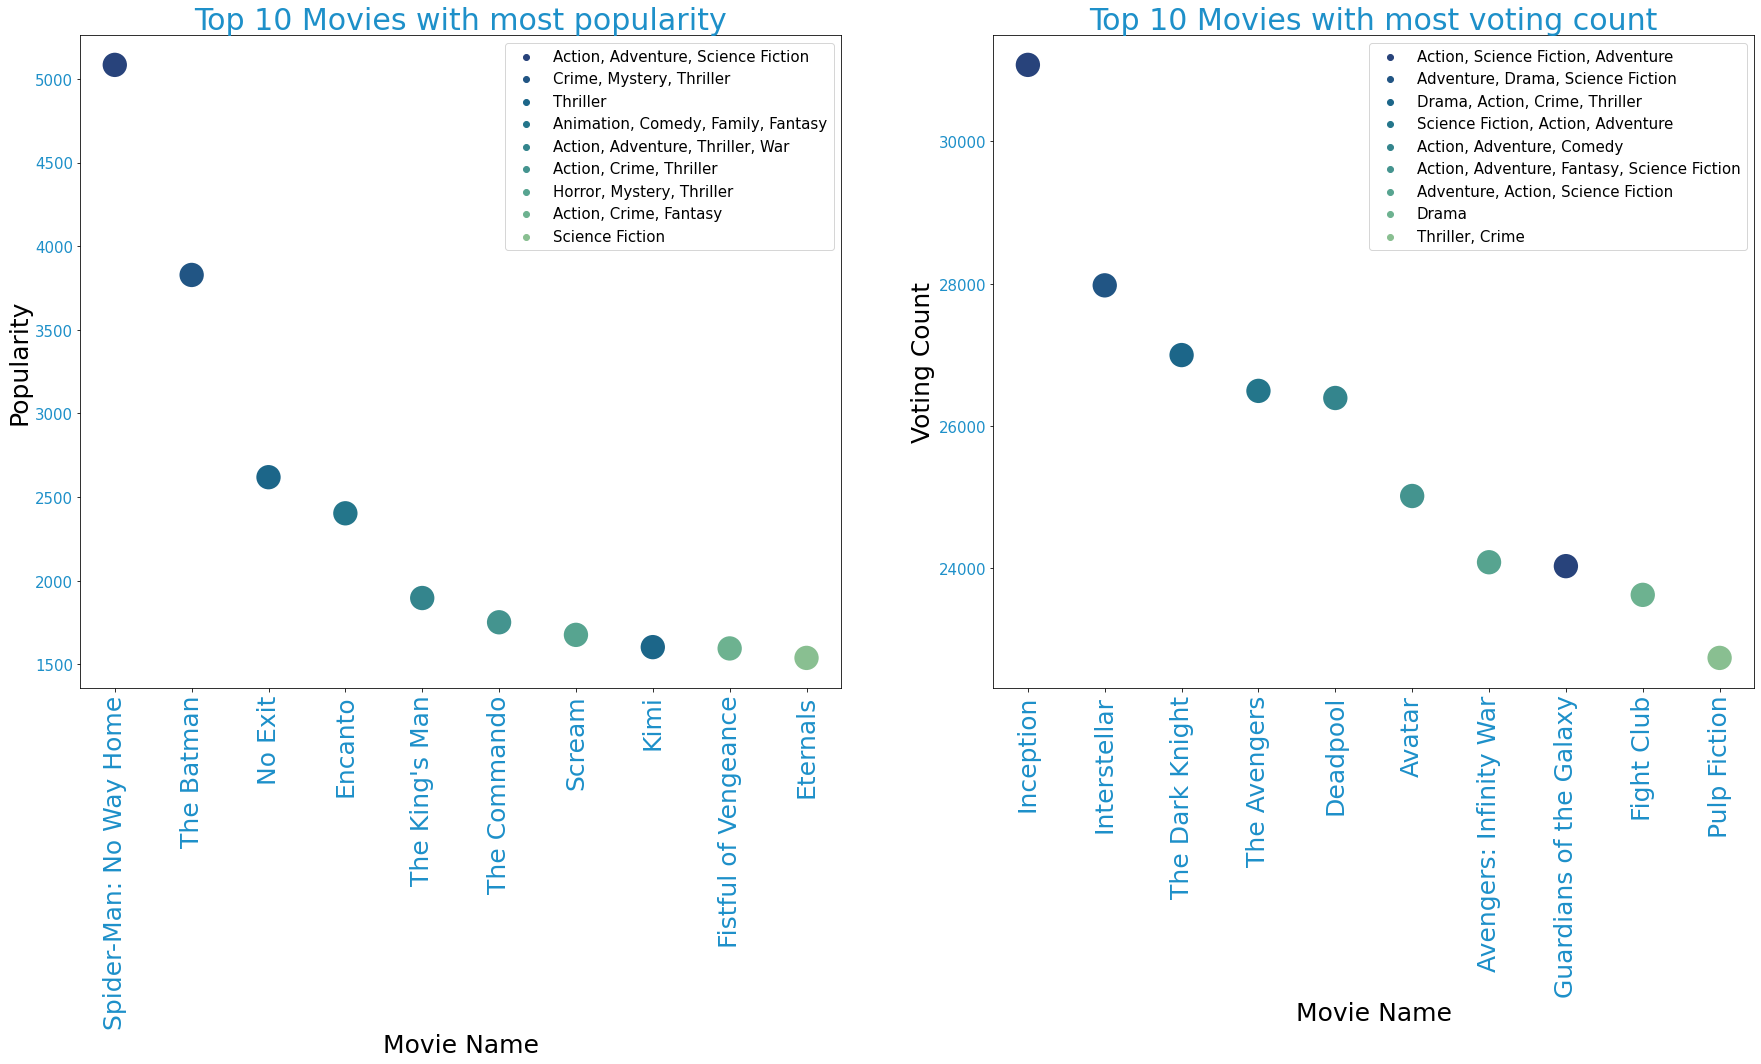

In [32]:
fig = plt.figure(figsize=(30,12))

sub = fig.add_subplot(1,2,1)

g = sns.scatterplot(x='Title',y='Popularity',data=top_10_popular,s=700,hue='Genre',palette=my_palette)
plt.title('Top 10 Movies with most popularity',size=30,color='#1e90c9')
plt.xticks(rotation=90,size=25,color='#1e90c9')
plt.yticks(size=15,color='#1e90c9')
plt.xlabel('Movie Name',size=25)
plt.ylabel('Popularity',size=25)
g.legend(fontsize=15)

# -------------------------------------------------------------------------------------------------------- #

sub = fig.add_subplot(1,2,2)

g = sns.scatterplot(x='Title',y='Vote_Count',data=top_10_vote_average,s=700,hue='Genre',palette=my_palette)
plt.title('Top 10 Movies with most voting count',size=30,color='#1e90c9')
plt.xticks(rotation=90,size=25,color='#1e90c9')
plt.yticks(size=15,color='#1e90c9')
plt.xlabel('Movie Name',size=25)
plt.ylabel('Voting Count',size=25)
g.legend(fontsize=15)

plt.show()

# From the previous graph I can now know which are the 10 most popular movies and the 10 highest voting count movies
## The most popular 3 movies are  : 
> 1 - Spider-Man: No Way Home  : (Action, Adventure, Science Fiction)<br><br>
> 2 - The Batman  : (Crime, Mystery, Thriller)<br><br>
> 3 - No Exit  : (Thriller)
## The highest voting count 3 movies are :   
> 1 - Inception	 : (Action, Science Fiction, Adventure)<br><br>
> 2 - Interstellar  : (Adventure, Drama, Science Fiction)<br><br>
> 3 - The Dark Knight  : (Drama, Action, Crime, Thriller	)

### The next code will be only used to get images from the image url from poster-url column then it will download it and it will show the best 3 using Pillow

 

The 3 most popular movies arranged from left to right : 




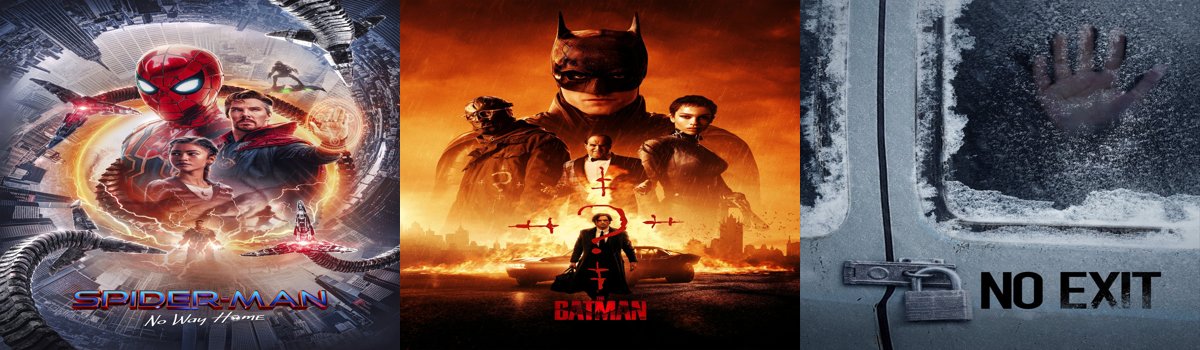

 

The 3 highest vote count movies arranged from left to right : 




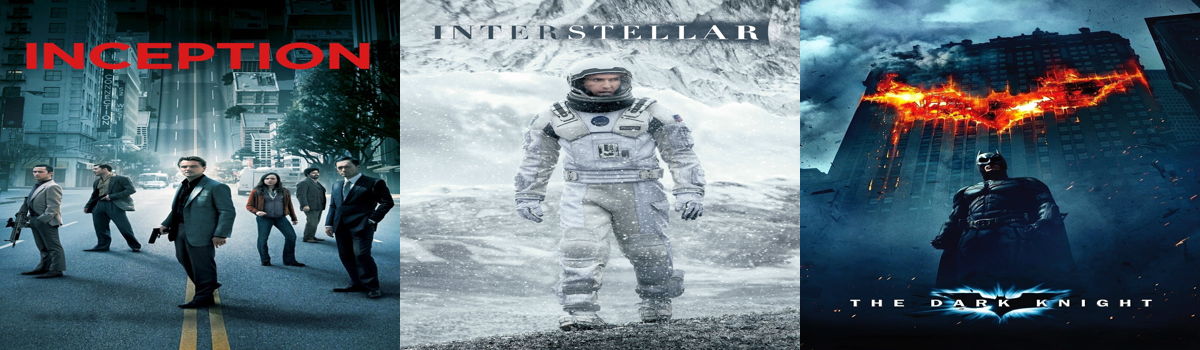

In [33]:
most_popular_3 = movies.sort_values(by='Popularity',ascending=False).head(3)
most_voting_count_3 = movies.sort_values(by='Vote_Count',ascending=False).head(3)

most_popular_movies_images = ['Images/image1_p.png','Images/image2_p.png','Images/image3_p.png']
most_voting_movies_images = ['Images/image1_v.png','Images/image2_v.png','Images/image3_v.png']

counter = 0

for i in most_popular_3['Poster_Url']:
    urllib.request.urlretrieve(i,most_popular_movies_images[counter])
    counter = counter + 1

counter = 0    

for i in most_voting_count_3['Poster_Url']:
    urllib.request.urlretrieve(i,most_voting_movies_images[counter])
    counter = counter + 1
    
    
im1 = Image.open('Images/image1_p.png')
im2 = Image.open('Images/image2_p.png')
im3 = Image.open('Images/image3_p.png')

image_1 = im1.resize((400,350))
image_2 = im2.resize((400,350))
image_3 = im3.resize((400,350))

print(Fore.LIGHTBLUE_EX,'\n\nThe 3 most popular movies arranged from left to right : \n\n')
display(Image.fromarray(np.hstack((np.array(image_1),np.array(image_2),np.array(image_3)))))

im1 = Image.open('Images/image1_v.png')
im2 = Image.open('Images/image2_v.png')
im3 = Image.open('Images/image3_v.png')

image_1 = im1.resize((400,350))
image_2 = im2.resize((400,350))
image_3 = im3.resize((400,350))

print(Fore.LIGHTBLUE_EX,'\n\nThe 3 highest vote count movies arranged from left to right : \n\n')
display(Image.fromarray(np.hstack((np.array(image_1),np.array(image_2),np.array(image_3)))))

# Now I want to know In which year is there most movies

In [34]:
year_dictionary = {}

for year in movies_data['Release_Date']:
    if year not in year_dictionary:
        year_dictionary[year] = 1
    else:
        year_dictionary[year] = year_dictionary[year] + 1
        
year_dictionary = dict(sorted(year_dictionary.items()))

In [35]:
movie_year_df = pd.DataFrame(list(year_dictionary.items()),columns = ['Year','Number of movies'])

movie_year_df.set_index('Year',inplace=True)
movie_year_df.tail(20)

,Number of movies
Year,
2003,182
2004,205
2005,216
2006,237
2007,245
2008,250
2009,291
2010,279
2011,316


## Top 10 years with most movies :

In [36]:
top_10_years_movies_number = movie_year_df.sort_values(by='Number of movies',ascending=False).head(10)
top_10_years_movies_number

,Number of movies
Year,
2021,712
2018,528
2017,510
2019,499
2016,469
2020,452
2015,390
2014,371
2013,348




Year with maxiumun number of movies is 2021 and that is obvious on the graph 




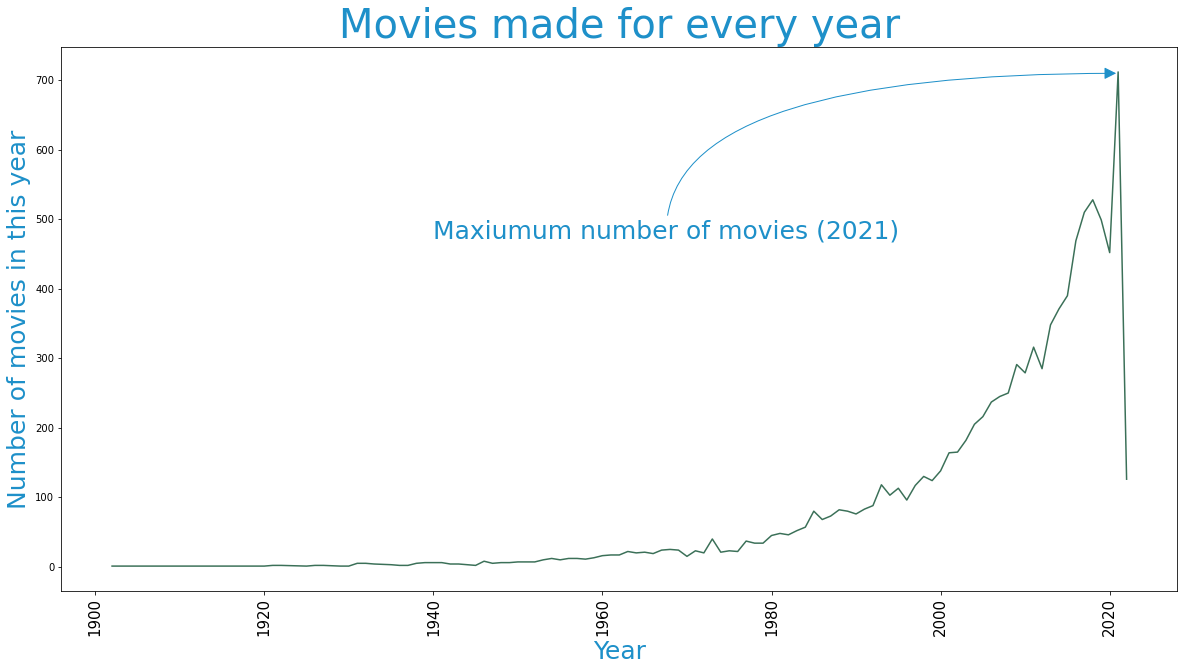

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(movie_year_df.index,movie_year_df['Number of movies'],color='#3b7058')

plt.ylabel('Number of movies in this year',size=25,color='#1e90c9')
plt.xlabel('Year',size=25,color='#1e90c9')
plt.title('Movies made for every year',size=40,color='#1e90c9')

plt.xticks(rotation=90,size=15)

ax.annotate("Maxiumum number of movies (2021)",               
             xy = (2021,710),  
             size=25,
             color='#1e90c9',
             xytext = (1940,500),
             horizontalalignment='left',
             va = "top",
             arrowprops = {'arrowstyle':'-|>','color':'#1e90c9','connectionstyle':'angle3'}   
)


print(Fore.LIGHTBLUE_EX + '\n\nYear with maxiumun number of movies is 2021 and that is obvious on the graph \n\n')
plt.show()

# Summary :
> - Most frequent Genre is `Drama` then `Comedy` then `Action` <br><br>
> - Single Genre with the highest votes is `Drama` then `Comedy` then `Action` <br><br>
> - The Genre with the highest votes is `(Action, Science Fiction, Adventure)` which belongs to `Inception` <br><br>
> - Highest popularity movie `is Spider-Man: No Way Home` then `The Batman` then `No Exit` <br><br>
> - Movies with highest votes is `Inception` then `Interstellar` then `The Dark Knight` <br><br>
> - Year that has the most number of movies is `2021`

# <br><br><br>The End